# Insurance Risk Analytics — Exploratory Data Analysis
Dataset: `MachineLearningRating_v3/MachineLearningRating_v3.txt` (pipe-delimited, Feb 2014 - Aug 2015).

## Notebook checklist
1. Load the raw TXT (via DVC) and confirm schema/shape.
2. Produce descriptive statistics, missing-value audit, and loss-ratio KPIs.
3. Generate three story-telling visuals (province risk, claim distribution, temporal trend).

In [10]:
# Core imports
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

from src.eda import basic_summary, loss_ratio

In [11]:
# Load AlphaCare data (pipe-delimited)
DATA_PATH = project_root / 'data' / 'MachineLearningRating_v3.txt'
assert DATA_PATH.exists(), f'Data file not found: {DATA_PATH}'
raw_df = pd.read_csv(
    DATA_PATH,
    sep='|',
    parse_dates=['TransactionMonth'],
    low_memory=False
)
print(f'Shape: {raw_df.shape}')
raw_df.head()

Shape: (1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [12]:
# Basic structure and quality checks
numeric_desc = raw_df.describe().T
categorical_card = raw_df.select_dtypes(include='object').nunique().sort_values(ascending=False)
missing = raw_df.isnull().sum()

print('Top 15 numerical fields by variance:')
display(numeric_desc.sort_values('std', ascending=False).head(15))

print('\nTop 15 categorical fields by cardinality:')
display(categorical_card.head(15))

print('\nLargest missing-value counts:')
missing[missing > 0].sort_values(ascending=False).head(20)

Top 15 numerical fields by variance:


,count,mean,min,25%,50%,75%,max,std
mmcode,999546.0,54877704.020474,4041200.0,60056925.0,60058415.0,60058418.0,65065350.0,13603805.343562
SumInsured,1000098.0,604172.732589,0.01,5000.0,7500.0,250000.0,12636200.0,1508331.837996
CustomValueEstimate,220456.0,225531.129942,20000.0,135000.0,220000.0,280000.0,26550000.0,564515.749848
UnderwrittenCoverID,1000098.0,104817.546075,1.0,55143.0,94083.0,139190.0,301175.0,63293.708455
PolicyID,1000098.0,7956.68245,14.0,4500.0,7071.0,11077.0,23246.0,5290.03851
PostalCode,1000098.0,3020.600887,1.0,827.0,2000.0,4180.0,9870.0,2649.854413
TotalClaims,1000098.0,64.86119,-12002.412281,0.0,0.0,0.0,393092.105263,2384.074695
cubiccapacity,999546.0,2466.743258,0.0,2237.0,2694.0,2694.0,12880.0,442.80064
CalculatedPremiumPerTerm,1000098.0,117.875691,0.0,3.2248,8.4369,90.0,74422.1679,399.701721
TotalPremium,1000098.0,61.905496,-782.576754,0.0,2.178333,21.929825,65282.603421,230.284513



Top 15 categorical fields by cardinality:


CapitalOutstanding    659
Model                 411
VehicleIntroDate      174
make                   46
SubCrestaZone          45
CoverCategory          28
CoverType              22
MainCrestaZone         16
CoverGroup             14
ExcessSelected         13
bodytype               13
Bank                   11
Province                9
LegalType               6
Title                   5
dtype: int64


Largest missing-value counts:


NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
WrittenOff                  641901
Converted                   641901
Rebuilt                     641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
mmcode                         552
VehicleType                    552
make                           552
VehicleIntroDate               552
NumberOfDoors                  552
bodytype                       552
kilowatts                      552
cubiccapacity                  552
Cylinders                      552
dtype: int64

In [13]:
# Portfolio KPIs
portfolio_loss_ratio = loss_ratio(raw_df)
total_policies = raw_df['PolicyID'].nunique() if 'PolicyID' in raw_df else len(raw_df)
print(f'Total policies: {total_policies:,}')
print(f'Portfolio loss ratio: {portfolio_loss_ratio:.2%}')

Total policies: 7,000
Portfolio loss ratio: 104.77%


C:\Users\alexo\AppData\Local\Temp\ipykernel_11612\901832084.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=province_metrics.index, y=province_metrics['LossRatio'], palette='magma')


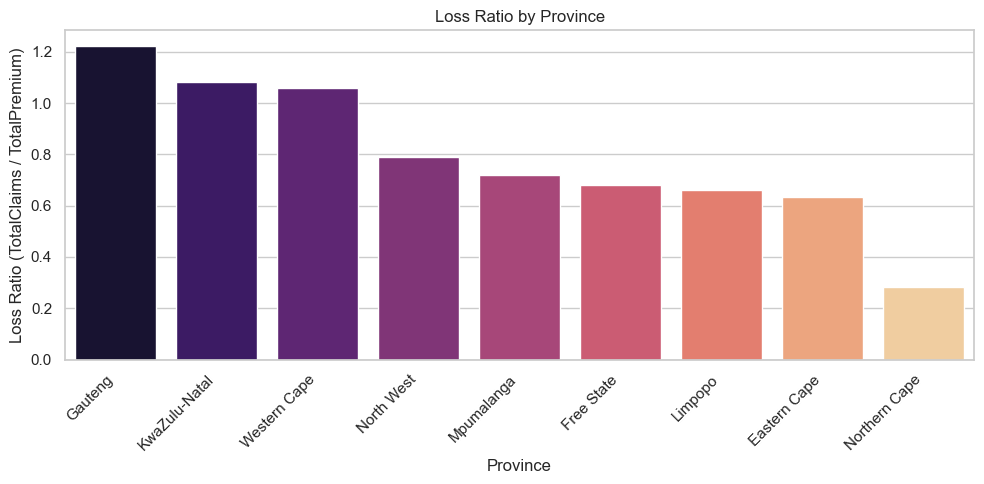

In [14]:
# Plot 1 — Loss ratio by province
plt.figure(figsize=(10, 5))
province_metrics = (raw_df.groupby('Province')[['TotalClaims', 'TotalPremium']].sum()
                    .assign(LossRatio=lambda d: d['TotalClaims'] / d['TotalPremium']))
province_metrics = province_metrics.sort_values('LossRatio', ascending=False)
sns.barplot(x=province_metrics.index, y=province_metrics['LossRatio'], palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('Loss Ratio by Province')
plt.ylabel('Loss Ratio (TotalClaims / TotalPremium)')
plt.tight_layout()

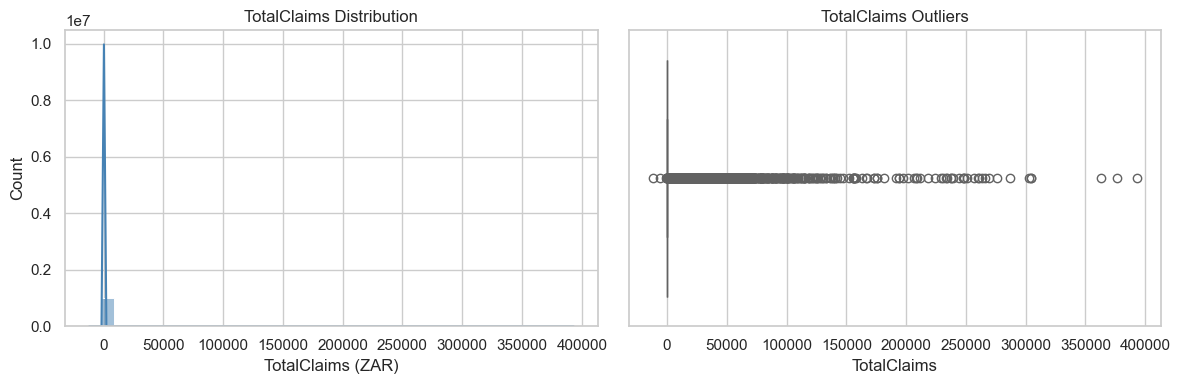

In [15]:
# Plot 2 — TotalClaims distribution and outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(raw_df['TotalClaims'], bins=40, kde=True, ax=axes[0], color='steelblue')
axes[0].set_title('TotalClaims Distribution')
axes[0].set_xlabel('TotalClaims (ZAR)')
sns.boxplot(x=raw_df['TotalClaims'], ax=axes[1], color='tomato')
axes[1].set_title('TotalClaims Outliers')
plt.tight_layout()

C:\Users\alexo\AppData\Local\Temp\ipykernel_11612\1764946411.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')[['TotalClaims', 'TotalPremium']].sum())


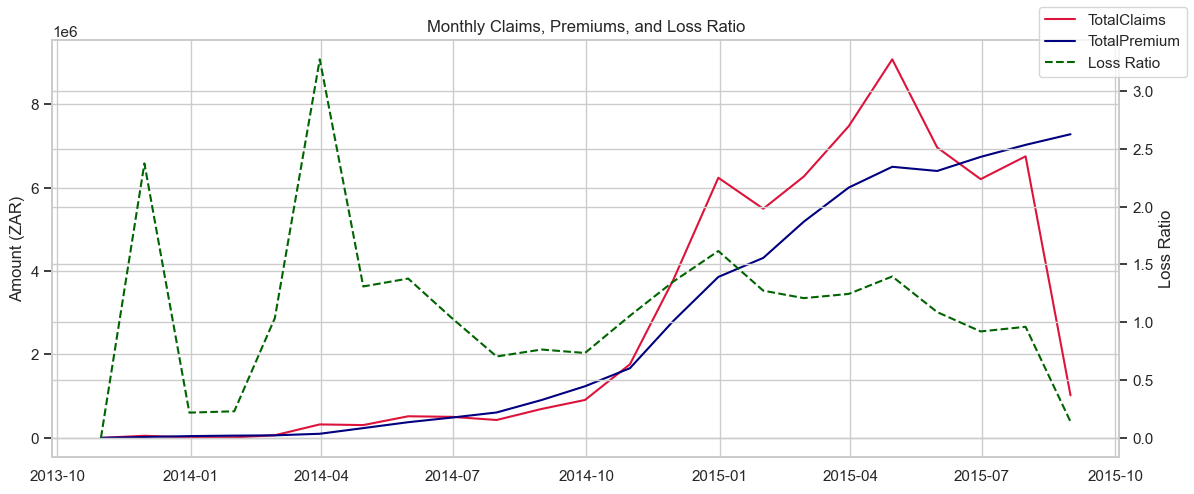

In [16]:
# Plot 3 — Monthly trend of claims, premium, and loss ratio
df_time = raw_df.copy()
monthly = (df_time.set_index('TransactionMonth')
           .resample('M')[['TotalClaims', 'TotalPremium']].sum())
monthly['LossRatio'] = monthly['TotalClaims'] / monthly['TotalPremium']
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(monthly.index, monthly['TotalClaims'], label='TotalClaims', color='crimson')
ax1.plot(monthly.index, monthly['TotalPremium'], label='TotalPremium', color='navy')
ax1.set_ylabel('Amount (ZAR)')
ax2 = ax1.twinx()
ax2.plot(monthly.index, monthly['LossRatio'], label='Loss Ratio', color='darkgreen', linestyle='--')
ax2.set_ylabel('Loss Ratio')
fig.legend(loc='upper right')
plt.title('Monthly Claims, Premiums, and Loss Ratio')
plt.tight_layout()

## Next steps
- Add commentary around segments (VehicleType, Gender, PostalCode) with notable lift in loss ratio.
- Feed findings into Task-1 report and design hypotheses for Task-3 tests.
- Version this notebook output via DVC or store cleaned aggregates for downstream modeling.